# **PROYECTO INTEGRADOR DE DOMINIO AUTÓNOMO (PIDA)**
---


*The Learning Gate*
*   NOMBRE: Eduardo Cedillo Paz
*   TRAYECTORIA: Senior Data Scientist


---
`PROPÓSITO DE LA CERTIFICACIÓN:` Evaluar, mediante un proyecto que el conjunto de competencias adquiridas en el programa de entrenamiento genere en la organización y/o persona, un impacto de mejora medible, claramente estructurado y autogestionado por parte del participante.

## **ETAPA I:** Entendimiento del negocio
Esta etapa consiste en definir el alcance del proyecto, considerando los objetivos comerciales, para evaluar con mayor precisión el impacto del proyecto en la empresa/organización.


* **Antecedentes:** ¿En qué empresa/organización se desarrolla el proyecto? ¿Cuál o cuáles son los proceso o procesos de negocios que serán impactados por el mismo?

  No se logro concretar que alguna de las empresas candidatas para poder realizar este proyecto diera su Visto Bueno y utilizar su Base de Datos para este fin, por tal motivo se solicito la autorización para utilizar un Data Set disponible de una organización que se dedica a propoporcionar este tipo de Data Set. Se anexa referencia Data Set público de Kaggle del cual anexo el link https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020
  
  El proyecto se centra en mejorar el mantenimiento de equipos mediante la utilización de datos de sensores y tecnologías como el Internet de las cosas. Tradicionalmente, las reparaciones se realizan después de que ocurre una falla, lo que puede resultar costoso y generar tiempo de inactividad. Sin embargo, con el avance de la tecnología actual, podemos anticiparnos a estas fallas mediante el análisis de datos. Al emplear algoritmos de aprendizaje automático, podemos identificar patrones en los datos de los sensores y predecir problemas antes de que ocurran, permitiéndonos realizar mantenimiento preventivo en lugar de reactivo. Esto nos ayuda a evitar costosas reparaciones y minimizar el tiempo de inactividad, lo que resulta en un ahorro significativo de recursos.

* **Formulación del problema:** ¿Qué es lo que se intenta resolver?

  El problema que se requiere resolver es evitar las costosas reparaciones y tiempos de inactividad no planificados en el mantenimiento de equipos, utilizando datos de sensores y tecnologías modernas para predecir fallas en los equipos antes de que ocurran.
  
  Este enfoque predictivo permite realizar mantenimiento antes de que se produzcan las fallas, optimizando la eficiencia operativa y reduciendo los costos asociados con las reparaciones reactivas.

**Contexto:** ¿Por qué es importante resolver este problema?

  Resolver este problema es importante por varias razones:

  1. Reducción de costos: Evitar reparaciones costosas y tiempos de inactividad no planificados mediante el mantenimiento preventivo ayuda a reducir los costos operativos para la empresa.

  2. Mejora de la eficiencia: Al predecir y abordar proactivamente las fallas potenciales, se optimiza la eficiencia operativa de los equipos industriales, lo que contribuye a un funcionamiento continuo de las operaciones.

  3. Incremento de la productividad: Menos tiempo dedicado a reparaciones no programadas significa más tiempo dedicado a la producción, lo que puede aumentar la productividad y la capacidad de producción de la empresa.

  4. Mejora de la competitividad: Las empresas que implementan prácticas de mantenimiento predictivo pueden ser más competitivas en el mercado al ofrecer productos y servicios de manera más confiable y eficiente que sus competidores.

* **Objetivos:** ¿Cuál es la meta prevista? ¿Cuál(es) es(son) los criterios de éxito?

  La meta prevista es implementar un sistema de mantenimiento predictivo que permita predecir y prevenir fallas en los equipos antes de que ocurran, con el objetivo de reducir costos asociados con reparaciones no planificadas y mejorar la eficiencia operativa de la empresa.
  
  **Criterio de éxito:**

  El modelo deberá tener un Recall(Sensibilidad) mayor al 65% para garantizar que el modelo capture la mayoría de las fallas, lo que contribuye a minimizar el riesgo de tiempos de inactividad no planificados y pérdidas económicas asociadas.

---

## **ETAPA II:** Entendimiento de los datos

Esta etapa consiste en la ingestión o recopilación de los datos y su exploración, mediante estadísticas descriptiva e inferencial y visualizaciones concluyentes.


* ¿Qué representa cada variable? (diccionario de datos)

  1. **UID:** Identificador único para cada punto de datos.
  2. **product ID:** Identificador del producto, que incluye información sobre la calidad y la variante del producto.
  3. **type:** Tipo de producto.
  4. **air temperature [K]:** Temperatura del aire en Kelvin.
  5. **process temperature [K]:** Temperatura del proceso en Kelvin.
  6. **rotational speed [rpm]:** Velocidad de rotación en revoluciones por minuto (rpm).
  7. **torque [Nm]:** Torque en Newton-metros (Nm).
  8. **tool wear [min]:** Desgaste de la herramienta en minutos.
  9. **machine_fail:** Etiqueta que indica si la máquina ha fallado en este punto de datos para alguno de los modos de falla. Valores (No Falla = 0, Falla = 1)
  10. **failure type:** Identifica el tipo de falla que puede presentarse en un equipo. El tipo de falla son: 1)No Failure, 2)Heat Dissipation Failure, 3)Power Failure, 4)Overstrain Failure, 5)Tool Wear Failure, 6)Random Failures

* ¿Cuáles son las entradas y la(s) salida(s)?

  Las entradas serían todas las variables anteriores, excepto "machine failure", ya que esta variable es la salida o la etiqueta que se está tratando de predecir en el contexto de mantenimiento predictivo. Las salidas serían la variable "machine failure", que indica si la máquina ha fallado o no en cada punto de datos.

  La falla de la máquina puede deberse a cinco modos diferentes:

  1. **Disipación de calor:** Una diferencia específica entre temperaturas causa la falla.
  2. **Falta de energía:** La potencia del proceso está fuera de los límites.
  3. **Sobrecarga:** La combinación de desgaste de herramienta y torque excede un umbral.
  4. **Desgaste de herramienta:** La herramienta se reemplaza o falla después de cierto tiempo.
  5. **Fallas aleatorias:** Ocurren con una baja probabilidad independientemente de los parámetros del proceso.

In [1]:
# Para cargar el Data Set en google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Manipulación de Datos
# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns


# Off FutureWarnings
# Esta librería se utiliza para filtrar y evitar que aparezcan
# advertencias futuras en el código.
import warnings
warnings.filterwarnings('ignore')

#Resampling (re-muestreo)
# - SMOTENC es una técnica de sobre-muestreo que se utiliza para crear datos sintéticos
#   para clases minoritarias cuando hay características numéricas y categóricas en los datos.

# - class_weight es un hyperparametro que se usa para asignar pesos a las clases durante
#   el entrenamiento del modelo, lo que ayuda a manejar el desequilibrio de clases
#   al dar más importancia a las clases minoritarias.
from imblearn.over_sampling import SMOTENC
from sklearn.utils import class_weight

#Dimension Reduction
# Reducción de Dimensiones
# PCA (Análisis de Componentes Principales)
# Se utilizará PCA para simplificar los datos y crear nuevas variables que capturen información relevante.
# En la predicción de fallas, ayuda a reducir la complejidad de datos de sensores para
# mejorar la precisión de los modelos.
from sklearn.decomposition import PCA

# Preprocessing
# Preprocesamiento
# Las técnicas que se estarán utilizando par el procesamiento de datos son las siguientes:

# StandardScaler: Estandariza las características numéricas para que tengan media cero y
# desviación estándar uno, lo que ayuda a los algoritmos de aprendizaje automátic
# a converger más rápido y a evitar que ciertas características dominen sobre otras.

# PowerTransformer: Transforma los datos para hacerlos más gaussianos, lo que puede mejorar
# el rendimiento de los modelos de aprendizaje automático, especialmente cuando los datos
# tienen distribuciones sesgadas.

# OrdinalEncoder: Codifica variables categóricas ordinales en números enteros,
# asignando un número único a cada categoría basado en su orden natural.

# OneHotEncoder: Codifica variables categóricas nominales en un formato de "dummy", creando
# una nueva columna binaria para cada categoría y asignando un 1 si la observación pertenece
# a esa categoría y un 0 en caso contrario.
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Models
# Modelos
# (Estos modelos son probables que se utilicen, posiblemente no en su totalidad)
# En el contexto de predicción de fallas en equipos:

# 1) DummyClassifier: Un modelo simple que se usa como punto de referencia para evaluar
#    el rendimiento de otros modelos más complejos.

# 2) LogisticRegression: Un modelo que se utiliza para predecir la probabilidad de ocurrencia
#    de una falla en función de las características de los equipos.

# 3) LogisticRegressionCV: Similar a LogisticRegression, pero con validación cruzada
#    incorporada para encontrar automáticamente el mejor valor de regularización.

# 4) RandomForestClassifier: Un modelo de bosque aleatorio que utiliza múltiples árboles
#    de decisión para predecir la ocurrencia de fallas en los equipos.

# 5) GradientBoostingClassifier: Un modelo que combina múltiples árboles de decisión
#    débiles para mejorar la precisión de las predicciones de fallas.

# 6) GridSearchCV: Una técnica que se utiliza para encontrar automáticamente los mejores
#    hiperparámetros para un modelo determinado a partir de un conjunto predefinido de valores.
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Models Pipelines
# Estos Pipelines nos permitiran tener un solo flujo de trabajo desde el procesamiento
# hasta la predicción final, facilitando la implementación, experimentaciñon y reproducción
# de los modelos
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC


# Model evaluation
# Evaluación del modelo
# de estas librerias las metrics que probablemente se estrán utilizando son las siguiente:
#  1) Precisión: Mide la proporción de predicciones correctas.
#  2) Sensibilidad: Mide la proporción de fallas reales identificadas correctamente.
#  3) F1-score: Combina precisión y sensibilidad en un solo valor.
#  4) Matriz de confusión: Proporciona detalles sobre la clasificación del modelo.
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

# Save model
# Esta klibrería nos permite almacenar modelos entrenados en archivos en el disco, lo que
# permite su reutilización sin necesidad de volver a entrenarlos cada vez.
# Esto ahorra tiempo y recursos computacionales.
import pickle

In [3]:
# Lectura del(los) archivo(s) de datos
df = pd.read_csv(r'/content/drive/MyDrive/TEC_SDS_Certificacion/failures_data.csv')
pd.options.mode.chained_assignment = None
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [5]:
## Se renombraran los nombres de las columnas para la siguiente etapa facilitar su manejo
rename_columns = {
    'UDI':'ID',
    'Product ID' : 'Product_ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Target': 'machine_fail',
    'Failure Type': 'Failure_type'
}

df.rename(rename_columns, axis = 1, inplace = True)

In [6]:
df.columns

Index(['ID', 'Product_ID', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'machine_fail',
       'Failure_type'],
      dtype='object')

In [7]:
## Renombrando las categorías
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}

cambio = df['Type'].replace(rename_type, inplace = True)

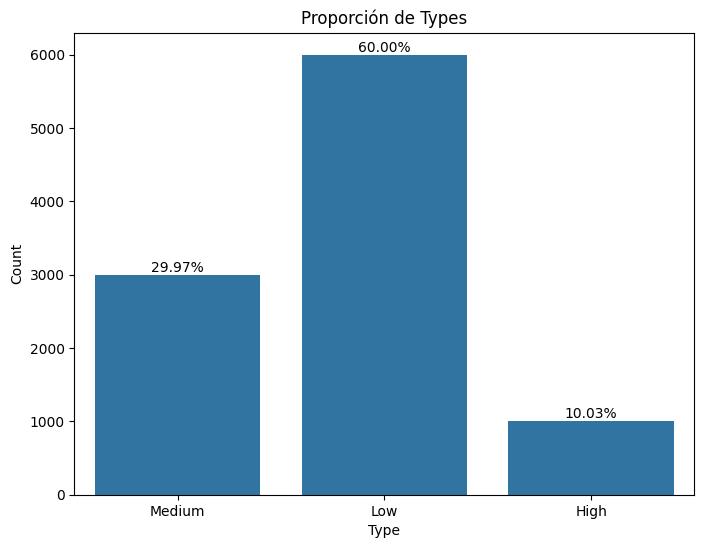

In [8]:
# Cuenta types
tipo_contagem = df['Type'].value_counts()

# Muestra el gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Type')
plt.title('Proporción de Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Se agrega el porcentaje como etiqueta
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

**Es posible analizar que la clase "Low" es la mayoritaria, la clase "High" es la minoritaria y la clase "Medium" tiene su significado.**

In [9]:
df

,ID,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,machine_fail,Failure_type
0,1,M14860,Medium,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,Low,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,Low,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,Low,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,Low,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,Medium,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,High,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,Medium,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,High,299.0,308.7,1408,48.5,25,0,No Failure


In [10]:
# Explorar la estructura del conjunto de datos
print("Dimensionalidad del conjunto de datos:")
print(df.shape)  # Obtener la dimensionalidad del conjunto de datos

Dimensionalidad del conjunto de datos:
(10000, 10)


In [11]:
## Verificar la estructura de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   Product_ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air_temperature      10000 non-null  float64
 4   Process_temperature  10000 non-null  float64
 5   Rotational_speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool_wear            10000 non-null  int64  
 8   machine_fail         10000 non-null  int64  
 9   Failure_type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [12]:
# Verificar los valores faltantes
missing_values = df.isnull().sum()

# Imprimir los valores faltantes por columna
print(missing_values)

ID                     0
Product_ID             0
Type                   0
Air_temperature        0
Process_temperature    0
Rotational_speed       0
Torque                 0
Tool_wear              0
machine_fail           0
Failure_type           0
dtype: int64


In [13]:
# Obtener la cardinalidad de las variables categóricas
cardinalidad = df.select_dtypes(include=['object']).nunique()

# Mostrar la cardinalidad
print(cardinalidad)

Product_ID      10000
Type                3
Failure_type        6
dtype: int64


In [14]:
## Análisis de características numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air_temperature,10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process_temperature,10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational_speed,10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool_wear,10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
machine_fail,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


**Como se nota, las renglones "Rotational_speed", "Torque" y "Tool_wear" pueden tener valores atípicos. Por lo tanto, se tendrá que analizar con mayor detalle para concluir si hay valores atípicos y cómo proceder con estos valores.**

In [15]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Filtrar las columnas que tienen tipo 'object' (que generalmente indican variables categóricas)
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object'].index.tolist()

print("Variables categóricas:")
print(variables_categoricas)

Variables categóricas:
['Product_ID', 'Type', 'Failure_type']


In [16]:
## Verificar la proporción de la columna "machine_fail".
df.machine_fail.value_counts()

machine_fail
0    9661
1     339
Name: count, dtype: int64

**Como se puede observar, el conjunto de datos tiene clases desbalanceadas en esta columna, aprox 95% de este conjunto de datos está clasificado sin fallas. Será necesario analizar cómo proceder con esto.**

In [17]:
## Verificar la proporción de la columna "Failure_type".
df['Failure_type'].value_counts()

Failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

**Como se puede ver, no tenemos una proporción adecuada en la distribución de la columna "Failure_type", por lo que será necesario aplicar alguna estrategia para manejar esto y evitar que el modelo tenga sobreajuste o que cualquier conjetura aleatoria para clasificar la clase de falla tenga un mejor rendimiento que cualquier modelo como DummyClassifier.**

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder:

* ¿Hay valores atípicos?
* ¿Existen distribuciones sesgadas en el conjunto de datos?
* ¿Cómo se distribuyen los datos en función de diferentes categorías?
* ¿Hay correlación entre las variables dependientes e independientes?
* ¿Hay desequilibrio en las clases de la variable objetivo?

In [18]:
# Obtener las clases únicas y contar su frecuencia
clases = df['Failure_type'].value_counts()

# Mostrar el número de clases
num_clases = len(clases)
print("Número de clases:", num_clases)

# Mostrar los nombres de las clases y sus valores
for clase, valor in clases.items():
    print("Clase:", clase, "- Valor:", valor)

Número de clases: 6
Clase: No Failure - Valor: 9652
Clase: Heat Dissipation Failure - Valor: 112
Clase: Power Failure - Valor: 95
Clase: Overstrain Failure - Valor: 78
Clase: Tool Wear Failure - Valor: 45
Clase: Random Failures - Valor: 18


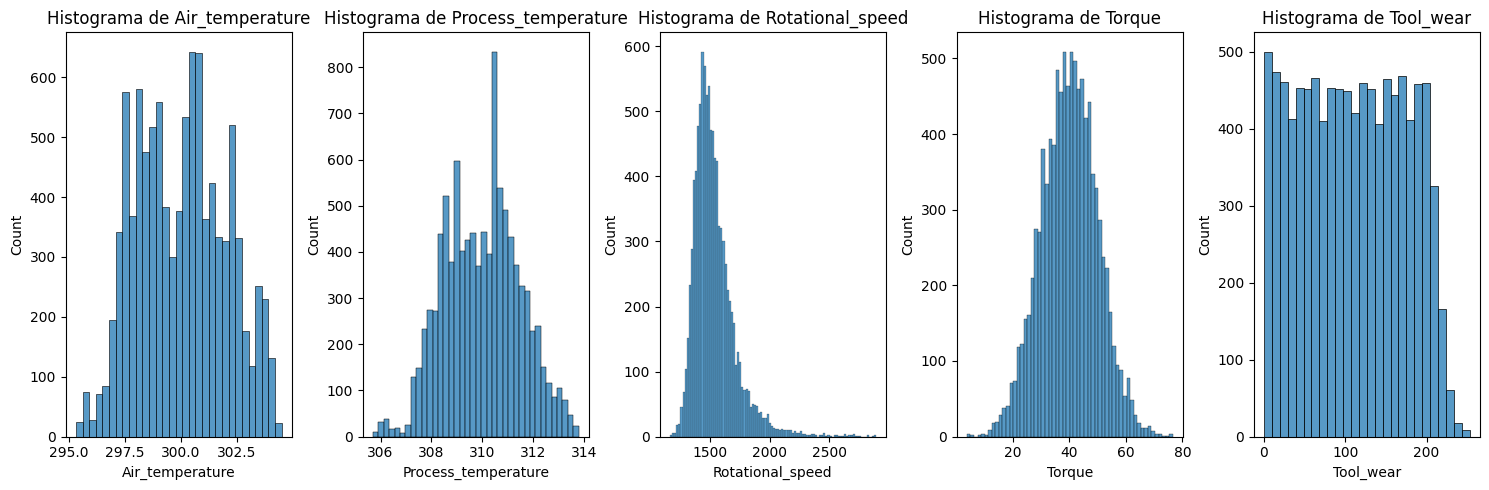

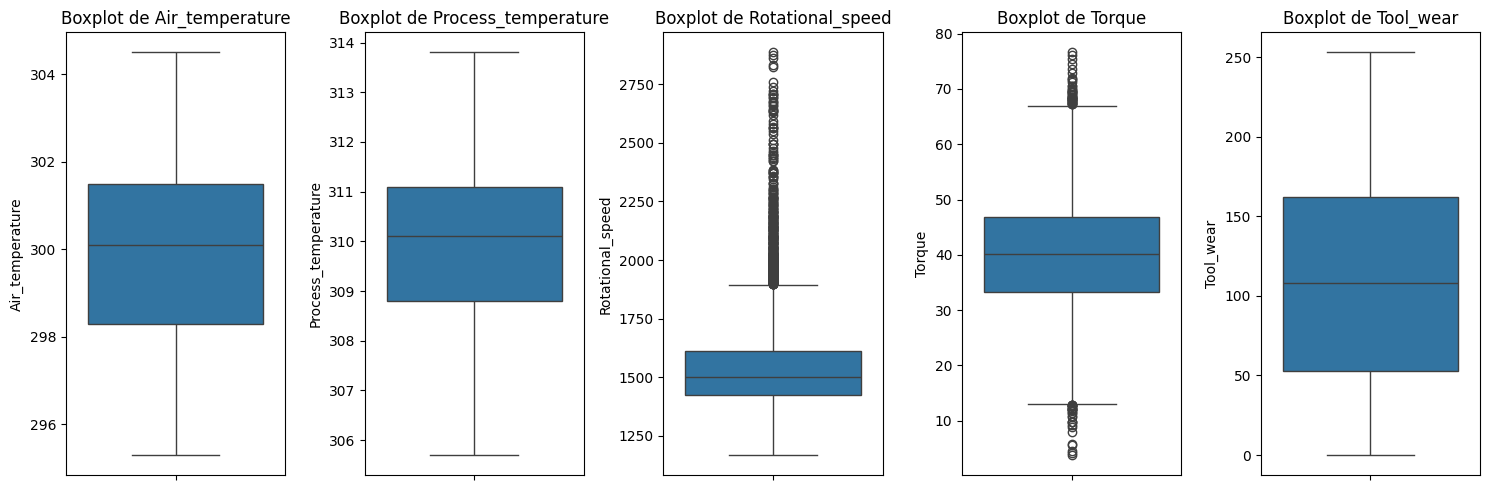

In [19]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

# Crea la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))

# Genera histogrmas
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histograma de {feature}')

# Ajusta trama secundaria
plt.tight_layout()

# Muestra los histogramas
plt.show()

# Crea la figra y kis ejes
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))

# Trazar la boxplot de lado a la lado
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')

# Ajusta trama secundaria
plt.tight_layout()

# Muesta lo boxplots
plt.show()



Adiconal del primer acercamiento con estas con esta información se incluyeron los Histogramas y diagramas de caja (Boxplot) de lo cual vale la pena soportar con un poco más de detalle.

Respecto al histograma, las columnas Temperatura del Aire, Temperatura del Proceso y Par (torque) son similares a una distribución normal, mientras que la velocidad de rotación es asimétrica con sesgo negativo.

En boxplot, se confirma la hipótesis de la existencia de valores atípicos en algunas columnas, como se mencionó al principio de este proyecto. Sin embargo, no eliminaremos estos valores porque tiene sentido que cuando una máquina tiene un tipo de falla, las mediciones de los sensores aumenten considerablemente. Además, cuando la velocidad de rotación aumenta mucho, tiene sentido que el par (torque) disminuya, este es un comportamiento físico, por lo que los valores atípicos detectados en la columna de par(Torque) con valores bajos posiblemente se deban a esto.

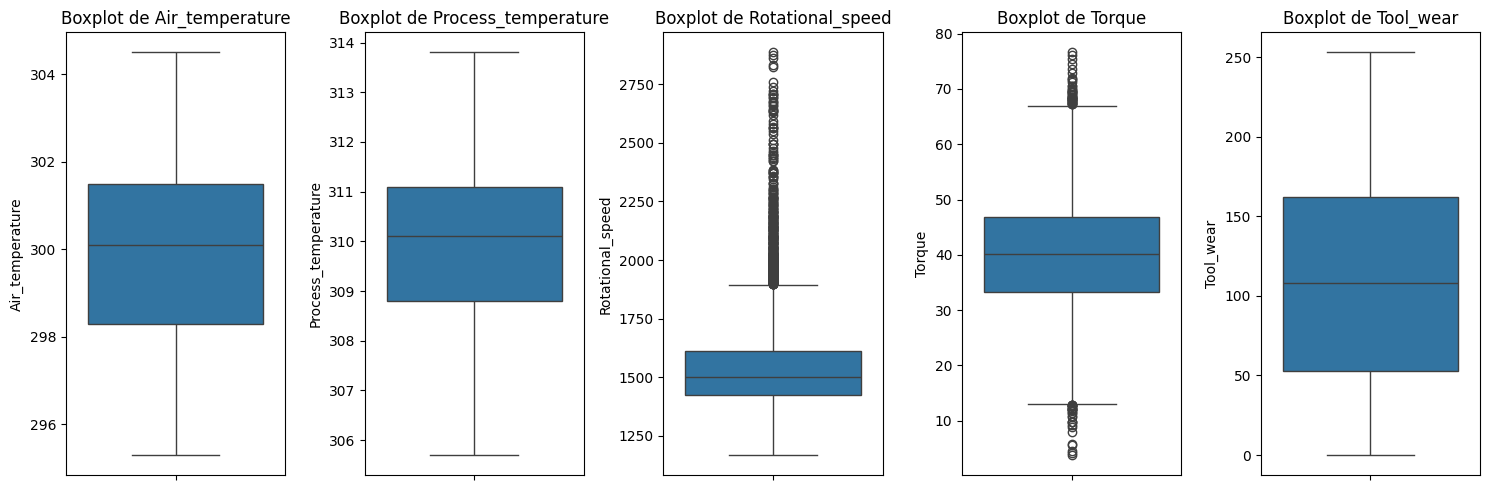

In [20]:
columnas_numericas = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']

# Crea la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=len(columnas_numericas), figsize=(15, 5))

# Crea el boxplot
for i, feature in enumerate(columnas_numericas):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')

# Adjusta el subplot
plt.tight_layout()

# Muestra los boxplots
plt.show()

Complementando la información de las gráficas anteriore se puede observar en las caracteristicas númericas de 'Rotational speed' y 'Torque' hay valores atipicos por lo que es probable que hay que tenerlos en consideración para la **Etapa III | Preparación de Datos**

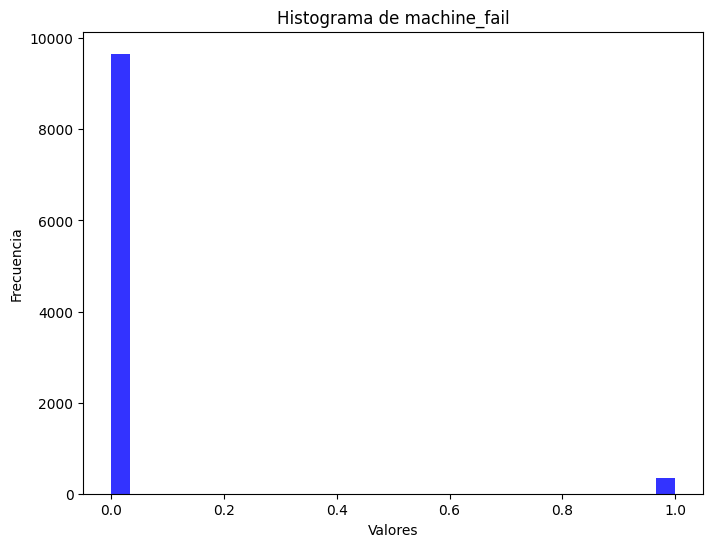

In [21]:
# Seleccionar una columna para visualizar su distribución
columna = 'machine_fail'

# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist(df[columna], bins=30, color='blue', alpha=0.8)
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

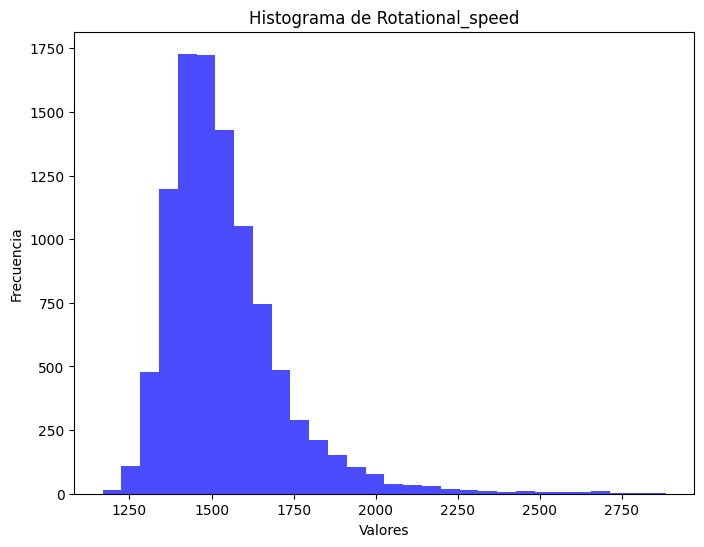

In [22]:
# Seleccionar una columna para visualizar su distribución
columna = 'Rotational_speed'

# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist(df[columna], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

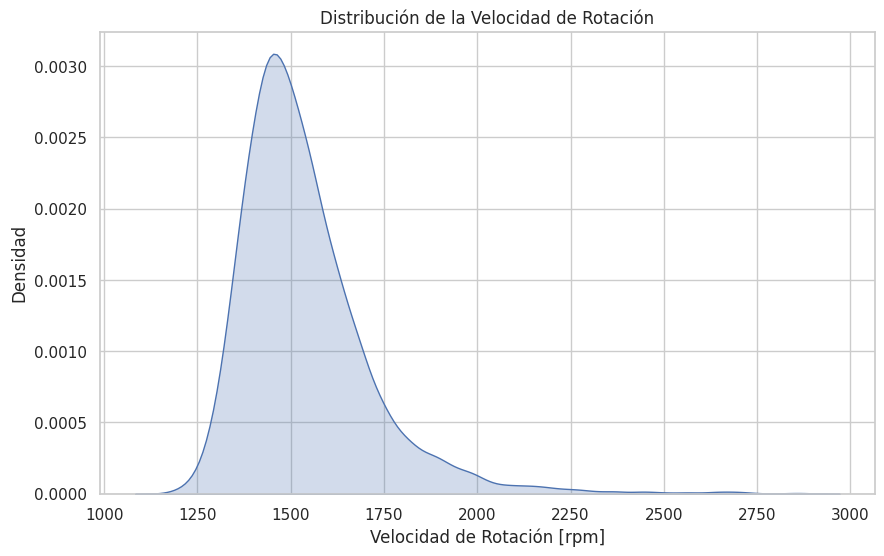

In [23]:
# Definir el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Rotational_speed'], shade=True)
plt.title('Distribución de la Velocidad de Rotación')
plt.xlabel('Velocidad de Rotación [rpm]')
plt.ylabel('Densidad')
plt.show()

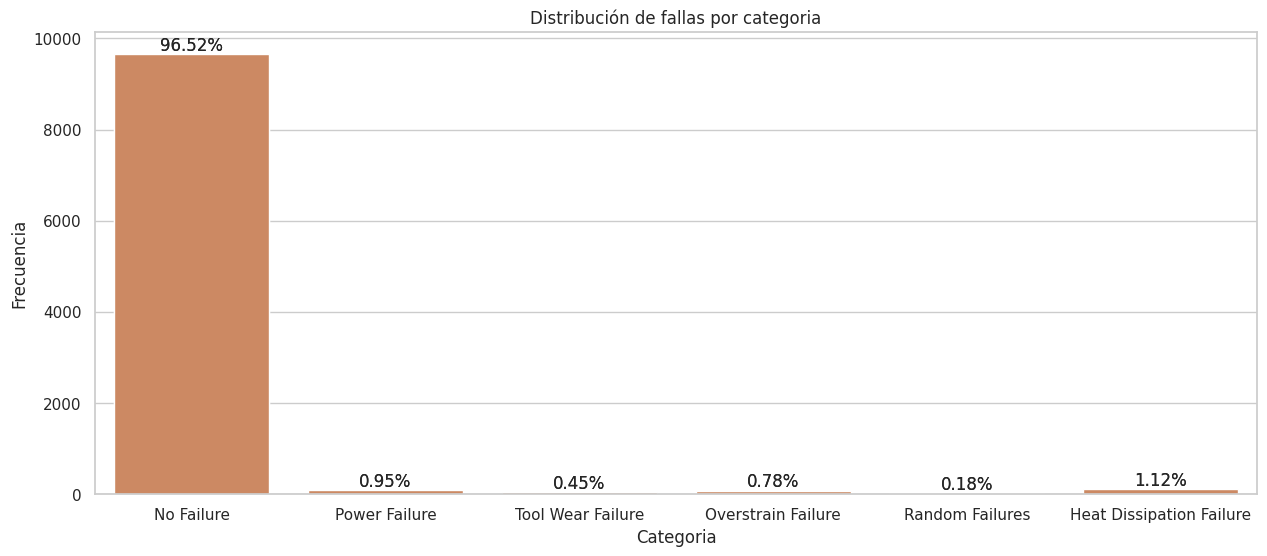

In [24]:
# Cuenta las tipos de falla
tipo_contagem = df['Failure_type'].value_counts()

# Genera la gráfica de barras
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='Failure_type')
plt.title('Distribución de fallas por categoria')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')

ax = sns.countplot(data=df, x = 'Failure_type')

# Agrega el porcentaje a las etiquetas
total = len(df['Failure_type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

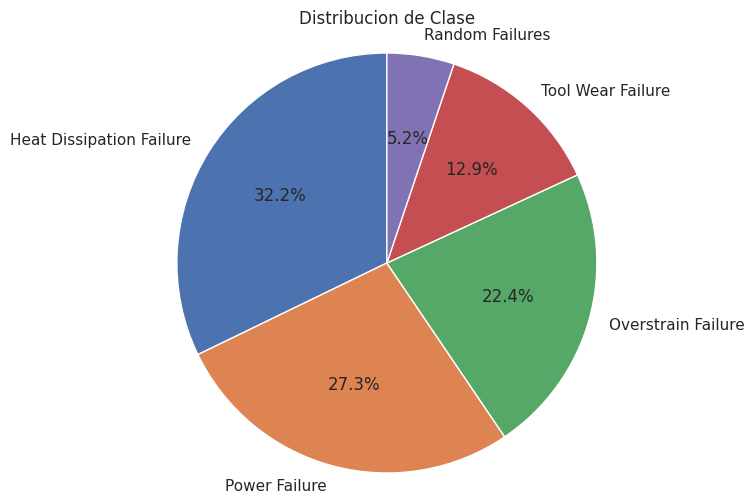

In [25]:
df_failure_type = df.loc[df['Failure_type'] != "No Failure"]
# Verificar el balanceo resultanteque
proportions = df_failure_type['Failure_type'].value_counts(normalize=True)


# Graficar el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribucion de Clase')
plt.show()

Como podemos observar en las gráficas anteriores tenemos dos problemas para cuando tengamos que generar nuestro modelo. El primero es que hay clases desbalanceadas, necesitaremos aplicar alguna estrategia para poder construir un modelo modesto como por ejemplo SMOTE-NC. El segundo es que vamos a lidiar con un problema multiclase que también es importante siempre prestar atención a esto.

**Nota:**

En la ETAPA III: Preparación de datos se trabajará con este hallazgo para facilitar la generación del modelo.

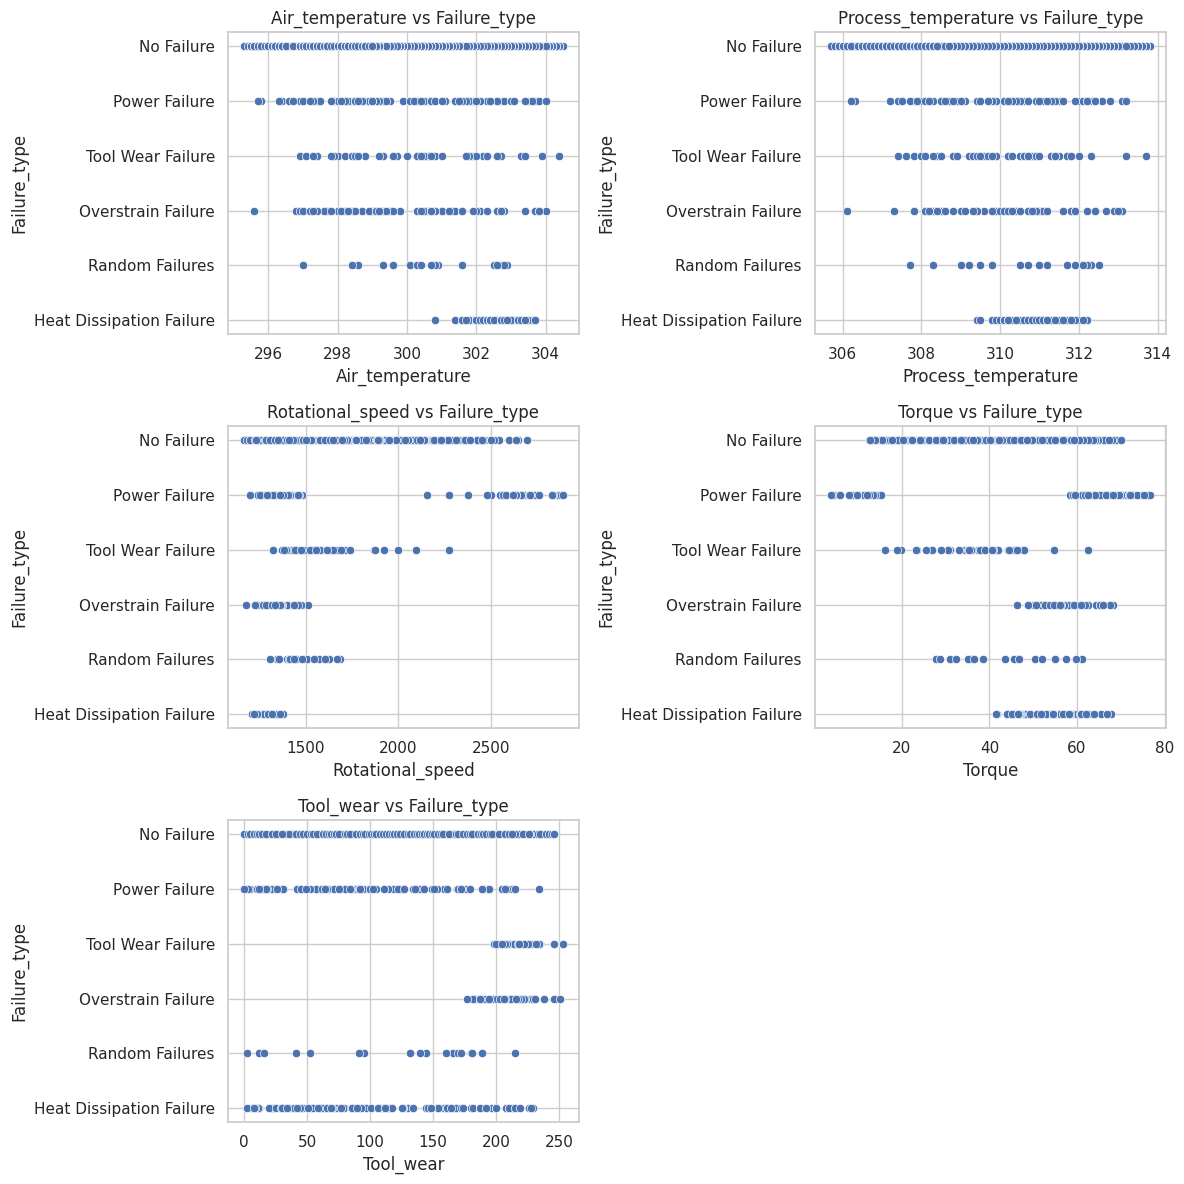

In [26]:
# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Variables independientes (X) y variable dependiente (y)
X = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']]
y = df['Failure_type']

# DataFrame combinando X y y para usar con seaborn
data = pd.concat([X, y], axis=1)

# Crear los gráficos de dispersión
for i, column in enumerate(X.columns):
    sns.scatterplot(x=column, y='Failure_type', data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{column} vs Failure_type')

# Eliminar el último subplot vacío
fig.delaxes(axes[2, 1])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**CONCLUSIONES:** ¿Cuáles son los hallazgos más importantes del análisis exploratorio de datos?

Después de realizar el análisis exploratorio de datos, se identificaron varios hallazgos importantes:

1. **Distribución de variables**: Se observó que las variables de temperatura, velocidad de rotación, torque y desgaste de la herramienta tienen distribuciones diversas, lo que sugiere la necesidad de considerar su impacto en el modelo predictivo.

2. **Correlación con la variable objetivo**: Se exploró la correlación entre estas variables y el tipo de falla. Se encontraron relaciones significativas, especialmente con la velocidad de rotación y el torque, lo que indica que podrían ser predictores importantes del fallo.

3. **Desbalance en las clases**: Se detectó un desbalance en las clases de la variable objetivo, donde el 95% de los datos están clasificados como sin fallo. Esto destaca la importancia de aplicar estrategias para abordar este desbalance y evitar que afecte el rendimiento del modelo.

4. **Variables categóricas**: Se identificaron variables categóricas, como el tipo de producto y el tipo de fallo, que podrían influir en el resultado del análisis y requeriría un tratamiento específico durante la modelización.

En resumen, el análisis exploratorio de datos reveló insights cruciales sobre la distribución de variables, la correlación con la variable objetivo y el desbalance en las clases. Estos hallazgos proporcionan una base sólida para el desarrollo de modelos predictivos eficaces para este contexto de mantenimiento predictivo.

Las siguientes son algunas de las preguntas comunes que se pueden abordar a través de un análisis exploratorio de datos:

* ¿Cuál es la dimensionalidad del conjunto de datos?
  * (10000, 10)
* ¿Qué tipo de datos tienen las variables?
  * <class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64

 1   Product_ID           10000 non-null  object

 2   Type                 10000 non-null  object

 3   Air_temperature      10000 non-null  float64

 4   Process_temperature  10000 non-null  float64

 5   Rotational_speed     10000 non-null  int64  

 6   Torque               10000 non-null  float64

 7   Tool_wear            10000 non-null  int64  

 8   machine_fail         10000 non-null  int64  

 9   Failure_type         10000 non-null  object

dtypes: float64(3), int64(4), object(3)

memory usage: 781.4+ KB

* ¿Hay valores faltantes en el conjunto de datos?
  
  No hay valores faltantes

* ¿Cuáles son las estadísticas resumidas del conjunto de datos?
  
  Se pueden observar en la celda comentada como ** ## Análisis de características númericas **

* ¿Cuál es la cardinalidad de las variables categóricas?
  
  Product ID      10000

  Type                3
  
  Failure Type        6
  
  dtype: int64

---

## **ETAPA III:** Preparación de los datos

En esta etapa se aplican operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático.

El procesamiento puede incluir:
* Manejo de valores faltantes y atípicos
* Generación de nuevas características
* Discretización o binning
* Codificación
* Escalamiento
* Transformación

In [27]:
# Analizando el valor de redundancia, contando las fallas en la columna 'Target'.
count_failures = (df['machine_fail'] == 1).sum()
print('Numero de fallas:', count_failures)

# Suma de ocurrencias de 'Failure_type' que no sean 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['machine_fail'] == 1), 'Failure_type'].count()
print('Suma de fallas diferentes de "No Failure":', sum_failures)

Numero de fallas: 339
Suma de fallas diferentes de "No Failure": 330


**Como podemos ver, hay 9 valores ambiguos, así que necesitamos eliminarlos.**

También se pueden utilizar métodos de filtrado para la selección de características y técnicas de reducción de dimensionalidad.

In [28]:
# Filtrar las filas que tienen 1 en la columna 'machine_fail' y 'No Failure' en la columna'Failure_type'
rows_to_remove = df[(df['machine_fail'] == 1) & (df['Failure_type'] == 'No Failure')]

# Eliminar esta fila filtrada en el dataframe principal
df.drop(rows_to_remove.index, inplace=True)

**Para el modelo en cuestión necesitamos clasificar el tipo de falla, por lo que requerimos eliminar las columnas innecesarias, en este caso no requerimos:**

  a) La columna "machine_file" | Porque siempre que la columna "Failure_type" sea diferente de "No Failure", "machine_fail" será 1 y 0 cuando sea "No Failure

  b) Las columnas "ID y "Product_ID" con solo identificadores únicos, por lo que tampoco las necesitamos.

In [29]:
# Remover las columnas innecesarias
drop_columns = ["ID", "Product_ID", "machine_fail"]
df.drop(drop_columns, axis = 1, inplace = True)

**CONCLUSIONES:** Enumerar y justificar las decisiones y técnicas empleadas.

**Revisando el contenido de la columna "Failure_type" el tipo de falla "Random Failures" debido a que no hay una cantidad significativa de esta clase para intentar predecir cuándo sucede, así que se eliminará ya que podemos tener problemas relacionados con clases muy desequilibradas.**

In [30]:
# Remover "Random Failures" de la columna "Failure_type"
df = df.loc[df['Failure_type'] != 'Random Failures']

Ya se había analizado anteriormente pero teníamos la clase "Random failure". Veamos esta distribución actualizada con un gráfico de barras para verlo con más claridad y dejar evidenca que se elimino la columna de "Random Failures.

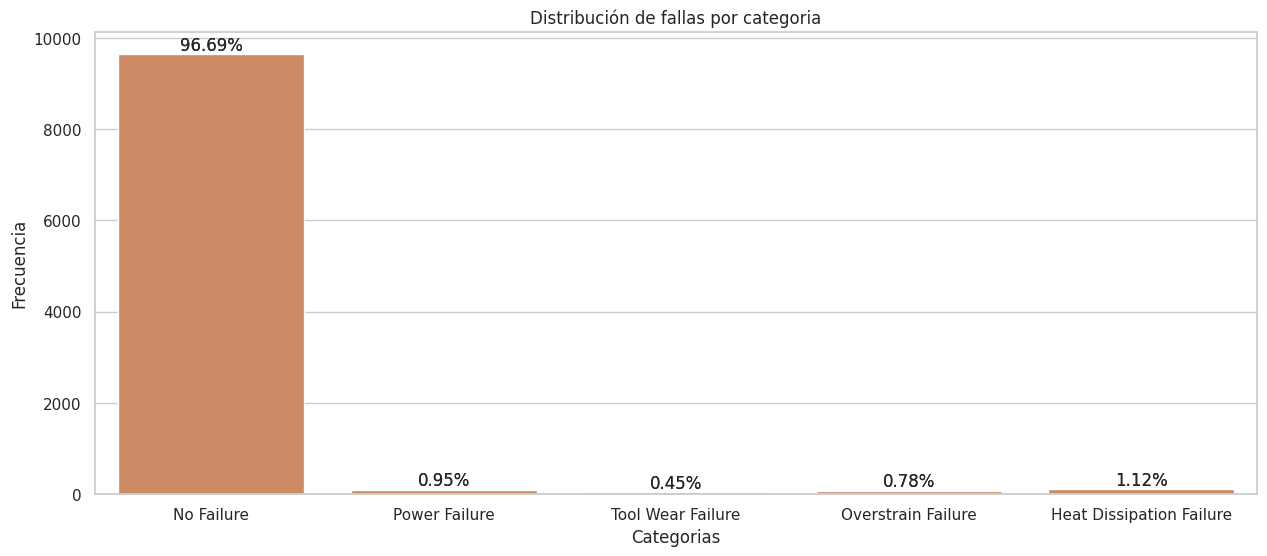

In [31]:
# Cuenta types
tipo_contagem = df['Failure_type'].value_counts()

# Dibuja la gráfica de barras
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='Failure_type')
plt.title('Distribución de fallas por categoria')
plt.xlabel('Categorias')
plt.ylabel('Frecuencia')

ax = sns.countplot(data=df, x = 'Failure_type')

# Agrega porcentajes a las barras
total = len(df['Failure_type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

---

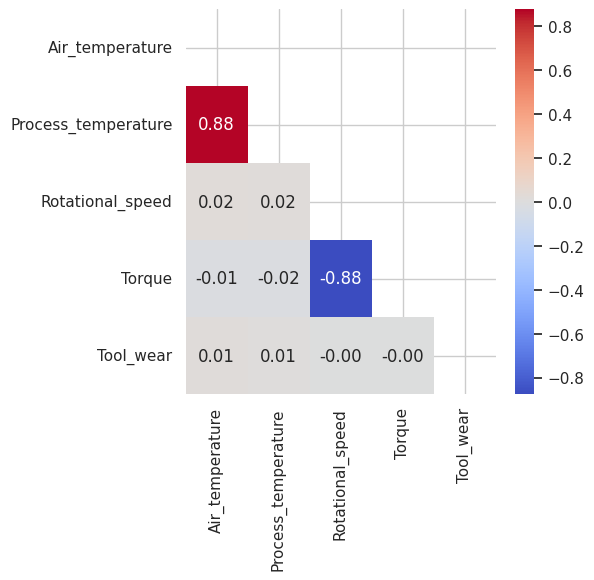

In [32]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Graficar la correlación de los valores numéricos aplicando una máscara
corr = numeric_df.corr()

# Mostrar el heatmap
plt.figure(figsize = (5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, mask=mask, cmap = 'coolwarm', fmt = ".2f")
plt.show()

**Se genera este Mapa de Calor de Correlación (Correlation Heatmap - CHM) para comprobar la hipótesis previamente encontrada en la sección anterior de que cuando aumenta el par (torque) disminuye la velocidad de rotación es cierta, hay una correlación negativa significativa entre estas características (-0.88).**

Además, ahora podemos ver que la temperatura del proceso y la temperatura del aire también tienen una correlación significativa, cuando la temperatura del aire aumenta, la temperatura del proceso también aumenta, y esto sucede de manera opuesta

In [33]:
# Crear un preprocesador ColumnTransformer para aplicar OneHotEncoder a las CATEGORIC_FEATURES
# y StandardScaler() a las NUMERIC_FEATURES

# Definir los pipelines para las transformaciones numéricas y categóricas
# parta tener una media igual a cero y una desviación estándar igual a uno
num_pipeline = Pipeline([
    ('num_features', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_features', OneHotEncoder(drop='first'))
])

# Crea el ColumnTransformer
# ColumnTransformer(): Esta clase puede aplicar un codificador one-hot a las
# variables categóricas y un escalador a las variables numéricas, todo en una
# sola operación.
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, NUMERIC_FEATURES),
    ('cat_trans', cat_pipeline, CATEGORIC_FEATURES)
])

**De acuerdo a lo que se ha visualizado se hará Escalamiento de características numéricas y se aplicará *OneHotEncoder* para las características categóricas.**


El escalar las características numéricas antes de modelar, es esencial porque garantiza una contribución equitativa de todas las características, mejora el rendimiento del algoritmo, y aumenta la precisión del modelo y la eficiencia del entrenamiento.

## **ETAPA IV:** Modelación y evaluación del modelo

En esta etapa se construyen y evalúan varios modelos usando diversos algoritmos. En caso de que los resultados sean deficientes, la metodología permite volver al primer paso para tener una comprensión de lo que está ocurriendo.


Las siguientes son acciones que se pueden abordar en este avance:
* Particionar los datos en conjunto de entrenamiento y conjunto de prueba (SI APLICA).
* Considerar al menos 3 modelos diferentes (con algoritmos variados) o 3 técnicas de modelado.
* Inspeccionar visualmente los resultados del clustering (SI APLICA).
* Sintetizar los resultados en una tabla comparativa ordenando los modelos por la métrica principal (definida en los criterios de éxito) e incorporando otras métricas pertinentes. Se deberán incluir también los tiempos de entrenamiento.
* Elegir el modelo final alineado con los objetivos y necesidades del negocio.
* Ajustar el modelo que proporcione el mejor rendimiento (OPCIONAL)

**En esta sección el objetivo es evaluar el rendimiento de modelos (máximo tres). Y se utilizará en algunos modelos SMOTE-NC para gestionar el desbalance de clases y explorar el uso de hiperparámetros dentro del modelo para equilibrar las clases sin utilizar SMOTE-NC.**

**Nota:**

SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) es una técnica de sobremuestreo utilizada en el campo del aprendizaje automático para equilibrar conjuntos de datos desbalanceados. SMOTENC es una variante del algoritmo SMOTE (Synthetic Minority Over-sampling Technique) y está diseñada específicamente para conjuntos de datos que contienen tanto características categóricas como continuas.

`Al equilibrar las clases, SMOTENC puede ayudar a mejorar el rendimiento de los modelos de clasificación, especialmente en términos de métricas de evaluación como el recall y la precisión, que son críticas en conjuntos de datos desbalanceados.`

Después de determinar qué enfoque mejora de manera más efectiva el rendimiento del modelo, procederemos a ajustar el modelo con GridSearchCV. Adcional y más allá de desarrollar el mejor modelo, esta sección también se probarán varias técnicas, como construir preprocesadores y pipelines (tuberías), para simplificar el código y hacer que el proceso de modelado sea más eficiente.

*Todos los enfoques en esta sección tienen como objetivo el puntaje de Recall y F1 macro, estás serían de acuerdo a mis conocimientos y perspectiva las mejores métrica para evaluar el mejor modelo para la aplicación.*








**Separar el Dataset en train y test**

Ahora que conocemos el número de componentes que explican nuestros datos, vamos a crear una copia de nuestro conjunto de datos y construir los pipelines. Antes de preparar el pipeline para escalar los valores numéricos (por ejemplo, StandardScaler/MinMaxScaler) y aplicar OneHotEncoder para las columnas categóricas, y abordar el desbalance de datos, es indispensable separar el conjunto de datos entre entrenamiento y prueba para prevenir la fuga de datos.

In [34]:
df_model = df.copy()
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]
y = df_model['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

**Codigo para priorizar el criterio de éxito enfocado al Recall**

Recall (Sensibilidad): Si bien la precisión es crucial, también se debe maximizar el recall para asegurar que se detecten la mayor cantidad posible de fallas reales en los equipos. Un alto recall garantiza que el modelo capture la mayoría de las fallas, lo que contribuye a minimizar el riesgo de tiempos de inactividad no planificados y pérdidas económicas asociadas.

Dado que es más importante minimizar los falsos negativos en este contexto, la métrica más importante sería Recall(Sensibilidad).
Un alto Recall (Sensibilidad) significa que el modelo es capaz de detectar la mayoría de las fallas reales, lo que ayuda a minimizar los falsos negativos y garantiza que se tomen medidas adecuadas cuando ocurren fallas.

In [35]:
def get_metrics_Recall(y_true, y_pred):
    # Calcular el F1 scores para cada clase
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)

    # Calcular el Recall para cada clase
    recall_per_class = recall_score(y_true, y_pred, average=None)

    dict_metrics_Recall = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'F1 Scores per Class': f1_scores_per_class,
        'Recall per Class': recall_per_class
    }
    return dict_metrics_Recall


In [36]:
# Nombres de las clases
nombres_clases = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure']


In [37]:
# Crear pipeline con MLPClassifier (FCNN) y ajustar parámetros para optimizar Recall
pip_model_fcnn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(random_state=2023, hidden_layer_sizes=(100,), learning_rate='adaptive'))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_fcnn.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
y_pred_fcnn = pip_model_fcnn.predict(X_test)

# Calcular métricas de evaluación
metrics_fcnn = get_metrics_Recall(y_test, y_pred_fcnn)

# Clases de Recall
recall_classes = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_fcnn['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info = [f'{nombres_clases[i]}: {round(metrics_fcnn["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_fcnn['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info = [f'{nombres_clases[i]}: {round(metrics_fcnn["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_fcnn['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase:",'\n'+ ''.join(f1_scores_info))
print("Recall por Clase:", '\n'+ ''.join(recall_info))

# Ver resultados
print("Resultados del Modelo MLPClassifier")
metrics_fcnn

F1 Scores por Clase: 
No Failure: 75.56%
Heat Dissipation Failure: 99.02%
Power Failure: 53.85%
Overstrain Failure: 74.29%
Tool Wear Failure: 20.0%

Recall por Clase: 
No Failure: 77.27%
Heat Dissipation Failure: 99.43%
Power Failure: 43.75%
Overstrain Failure: 68.42%
Tool Wear Failure: 11.11%

Resultados del Modelo MLPClassifier


{'Accuracy': 0.9804511278195489,
 'Balanced Accuracy': 0.5999692947317159,
 'Macro Recall': 0.5999692947317159,
 'Macro Precision': 0.8475497373421259,
 'Macro F1': 0.6454130507821783,
 'F1 Scores per Class': array([0.75555556, 0.99019102, 0.53846154, 0.74285714, 0.2       ]),
 'Recall per Class': array([0.77272727, 0.99429756, 0.4375    , 0.68421053, 0.11111111])}

In [39]:
# Modelo FCNN con SMOTENC

# Obtener los índices de las características categóricas para SMOTENC
categorical_features_indices = [i for i, feature in enumerate(NUMERIC_FEATURES + CATEGORIC_FEATURES)
                                if feature in CATEGORIC_FEATURES]

# Crear pipeline con MLPClassifier (FCNN) y ajustar parámetros para optimizar Recall con SMOTENC
pip_model_fcnn_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),
    ('model', MLPClassifier(random_state=2023, hidden_layer_sizes=(100,), learning_rate='adaptive'))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_fcnn_smotenc.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
fcnn_smotenc = pip_model_fcnn_smotenc
y_pred_fcnn_smotenc = pip_model_fcnn_smotenc.predict(X_test)

# Calcular métricas de evaluación
metrics_fcnn_smotenc = get_metrics_Recall(y_test, y_pred_fcnn_smotenc)

# Clases de Recall
recall_classes_smotenc = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_fcnn_smotenc['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_smotenc = [f'{nombres_clases[i]}: {round(metrics_fcnn_smotenc["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_fcnn_smotenc['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_smotenc = [f'{nombres_clases[i]}: {round(metrics_fcnn_smotenc["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_fcnn_smotenc['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase:",'\n'+ ''.join(f1_scores_info_smotenc))
print("Recall por Clase:", '\n'+ ''.join(recall_info_smotenc))

# Ver resultados
print("Resultados del Modelo MLPClassifier con SMOTENC")
metrics_fcnn_smotenc

F1 Scores por Clase: 
No Failure: 85.71%
Heat Dissipation Failure: 98.72%
Power Failure: 85.71%
Overstrain Failure: 71.79%
Tool Wear Failure: 22.22%

Recall por Clase: 
No Failure: 95.45%
Heat Dissipation Failure: 98.03%
Power Failure: 93.75%
Overstrain Failure: 73.68%
Tool Wear Failure: 44.44%

Resultados del Modelo MLPClassifier con SMOTENC


{'Accuracy': 0.974937343358396,
 'Balanced Accuracy': 0.8107265356354739,
 'Macro Recall': 0.8107265356354739,
 'Macro Precision': 0.6819232448453766,
 'Macro F1': 0.7283332520607384,
 'F1 Scores per Class': array([0.85714286, 0.98720961, 0.85714286, 0.71794872, 0.22222222]),
 'Recall per Class': array([0.95454545, 0.98030067, 0.9375    , 0.73684211, 0.44444444])}

In [40]:
with open('../content/drive/MyDrive/TEC_SDS_Certificacion/model_fcnn_smotenc.pkl', 'wb') as model_file:
    pickle.dump(fcnn_smotenc, model_file)

El resultado cumple con el objetivo específico de maximizar el Recall (Sensibilidad) al ajustar el modelo utilizando la función `get_metrics_Recall()`, que calcula métricas enfocadas en Recall, y al *utilizar el MLPClassifier se cumple con el objetivo de minimizar los falsos negativos*.

Explicación:
- La función `get_metrics_Recall()` calcula métricas específicas para evaluar el desempeño del modelo con un enfoque en el Recall, incluyendo el Macro Recall y el Recall per Class.
- El modelo MLPClassifier se ajusta utilizando parámetros y estrategias que están diseñadas para optimizar el Recall, como el uso de muestras ponderadas y la configuración de los parámetros del modelo.
- Al maximizar el Recall, se garantiza que el modelo sea capaz de detectar la mayoría de las fallas reales, lo que ayuda a minimizar los falsos negativos y asegura que se tomen medidas adecuadas cuando ocurren fallas, como es requerido.

In [41]:
# Modelo RandomForestClassifier sin SMOTENC
pip_model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=2023))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_rf.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
y_pred_rf = pip_model_rf.predict(X_test)

# Calcular métricas de evaluación
metrics_rf = get_metrics_Recall(y_test, y_pred_rf)

# Clases de Recall
recall_classes_rf = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_rf['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_rf = [f'{nombres_clases[i]}: {round(metrics_rf["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_rf['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_rf = [f'{nombres_clases[i]}: {round(metrics_rf["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_rf['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase (RandomForestClassifier):",'\n'+ ''.join(f1_scores_info_rf))
print("Recall por Clase (RandomForestClassifier):", '\n'+ ''.join(recall_info_rf))

# Ver resultados
print("Resultados del Modelo RandomForestClassifier sin SMOTENC")
metrics_rf


F1 Scores por Clase (RandomForestClassifier): 
No Failure: 80.95%
Heat Dissipation Failure: 99.07%
Power Failure: 60.87%
Overstrain Failure: 66.67%
Tool Wear Failure: 0.0%

Recall por Clase (RandomForestClassifier): 
No Failure: 77.27%
Heat Dissipation Failure: 99.79%
Power Failure: 43.75%
Overstrain Failure: 52.63%
Tool Wear Failure: 0.0%

Resultados del Modelo RandomForestClassifier sin SMOTENC


{'Accuracy': 0.9819548872180451,
 'Balanced Accuracy': 0.5468938897859663,
 'Macro Recall': 0.5468938897859663,
 'Macro Precision': 0.7485478701165977,
 'Macro F1': 0.6151244207320647,
 'F1 Scores per Class': array([0.80952381, 0.99073598, 0.60869565, 0.66666667, 0.        ]),
 'Recall per Class': array([0.77272727, 0.99792639, 0.4375    , 0.52631579, 0.        ])}

In [42]:
# Modelo RandomForestClassifier con SMOTENC
pip_model_rf_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),
    ('model', RandomForestClassifier(random_state=2023))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_rf_smotenc.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
y_pred_rf_smotenc = pip_model_rf_smotenc.predict(X_test)

# Calcular métricas de evaluación
metrics_rf_smotenc = get_metrics_Recall(y_test, y_pred_rf_smotenc)

# Clases de Recall
recall_classes_rf_smotenc = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_rf_smotenc['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_rf_smotenc = [f'{nombres_clases[i]}: {round(metrics_rf_smotenc["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_rf_smotenc['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_rf_smotenc = [f'{nombres_clases[i]}: {round(metrics_rf_smotenc["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_rf_smotenc['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase (RandomForestClassifier):",'\n'+ ''.join(f1_scores_info_rf_smotenc))
print("Recall por Clase (RandomForestClassifier):", '\n'+ ''.join(recall_info_rf_smotenc))

# Ver resultados
print("Resultados del Modelo RandomForestClassifier con SMOTENC")
metrics_rf_smotenc


F1 Scores por Clase (RandomForestClassifier): 
No Failure: 72.41%
Heat Dissipation Failure: 98.33%
Power Failure: 66.67%
Overstrain Failure: 66.67%
Tool Wear Failure: 13.33%

Recall por Clase (RandomForestClassifier): 
No Failure: 95.45%
Heat Dissipation Failure: 97.62%
Power Failure: 68.75%
Overstrain Failure: 68.42%
Tool Wear Failure: 22.22%

Resultados del Modelo RandomForestClassifier con SMOTENC


{'Accuracy': 0.9674185463659147,
 'Balanced Accuracy': 0.7049263300931059,
 'Macro Recall': 0.7049263300931059,
 'Macro Precision': 0.593232310283398,
 'Macro F1': 0.6348188829867051,
 'F1 Scores per Class': array([0.72413793, 0.98328982, 0.66666667, 0.66666667, 0.13333333]),
 'Recall per Class': array([0.95454545, 0.97615345, 0.6875    , 0.68421053, 0.22222222])}

In [43]:
# Modelo GradientBoostingClassifier sin SMOTENC
pip_model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_gb.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
y_pred_gb = pip_model_gb.predict(X_test)

# Calcular métricas de evaluación
metrics_gb = get_metrics_Recall(y_test, y_pred_gb)

# Clases de Recall
recall_classes_gb = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_gb['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_gb = [f'{nombres_clases[i]}: {round(metrics_gb["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_gb['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_gb = [f'{nombres_clases[i]}: {round(metrics_gb["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_gb['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase (GradientBoostingClassifier):",'\n'+ ''.join(f1_scores_info_gb))
print("Recall por Clase (GradientBoostingClassifier):", '\n'+ ''.join(recall_info_gb))

# Ver resultados
print("Resultados del Modelo GradientBoostingClassifier sin SMOTENC")
metrics_gb


F1 Scores por Clase (GradientBoostingClassifier): 
No Failure: 84.44%
Heat Dissipation Failure: 99.15%
Power Failure: 57.14%
Overstrain Failure: 80.0%
Tool Wear Failure: 0.0%

Recall por Clase (GradientBoostingClassifier): 
No Failure: 86.36%
Heat Dissipation Failure: 99.48%
Power Failure: 50.0%
Overstrain Failure: 73.68%
Tool Wear Failure: 0.0%

Resultados del Modelo GradientBoostingClassifier sin SMOTENC


{'Accuracy': 0.9824561403508771,
 'Balanced Accuracy': 0.6190588871443419,
 'Macro Recall': 0.6190588871443419,
 'Macro Precision': 0.6711820325676502,
 'Macro F1': 0.641469617382818,
 'F1 Scores per Class': array([0.84444444, 0.99147507, 0.57142857, 0.8       , 0.        ]),
 'Recall per Class': array([0.86363636, 0.99481597, 0.5       , 0.73684211, 0.        ])}

In [45]:
# Modelo GradientBoostingClassifier con SMOTENC
pip_model_gb_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_gb_smotenc.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
gbc_smotenc = pip_model_gb_smotenc
y_pred_gb_smotenc = pip_model_gb_smotenc.predict(X_test)

# Calcular métricas de evaluación
metrics_gb_smotenc = get_metrics_Recall(y_test, y_pred_gb_smotenc)

# Clases de Recall
recall_classes_gb_smotenc = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_gb_smotenc['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_gb_smotenc = [f'{nombres_clases[i]}: {round(metrics_gb_smotenc["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_gb_smotenc['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_gb_smotenc = [f'{nombres_clases[i]}: {round(metrics_gb_smotenc["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_gb_smotenc['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase (GradientBoostingClassifier):",'\n'+ ''.join(f1_scores_info_gb_smotenc))
print("Recall por Clase (GradientBoostingClassifier):", '\n'+ ''.join(recall_info_gb_smotenc))

# Ver resultados
print("Resultados del Modelo GradientBoostingClassifier con SMOTENC")
metrics_gb_smotenc


F1 Scores por Clase (GradientBoostingClassifier): 
No Failure: 81.48%
Heat Dissipation Failure: 97.21%
Power Failure: 68.18%
Overstrain Failure: 71.11%
Tool Wear Failure: 12.5%

Recall por Clase (GradientBoostingClassifier): 
No Failure: 100.0%
Heat Dissipation Failure: 94.92%
Power Failure: 93.75%
Overstrain Failure: 84.21%
Tool Wear Failure: 55.56%

Resultados del Modelo GradientBoostingClassifier con SMOTENC


{'Accuracy': 0.9468671679197995,
 'Balanced Accuracy': 0.8568714587141779,
 'Macro Recall': 0.8568714587141779,
 'Macro Precision': 0.5810425897647541,
 'Macro F1': 0.6609740936486357,
 'F1 Scores per Class': array([0.81481481, 0.97212636, 0.68181818, 0.71111111, 0.125     ]),
 'Recall per Class': array([1.        , 0.94919647, 0.9375    , 0.84210526, 0.55555556])}

In [46]:
with open('../content/drive/MyDrive/TEC_SDS_Certificacion/model_gbc_smotenc.pkl', 'wb') as model_file:
    pickle.dump(gbc_smotenc, model_file)

In [47]:
# Modelo DummyClassifier sin SMOTENC
pip_model_dummy = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyClassifier(strategy="most_frequent", random_state=2023))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_dummy.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
y_pred_dummy = pip_model_dummy.predict(X_test)

# Calcular métricas de evaluación
metrics_dummy = get_metrics_Recall(y_test, y_pred_dummy)

# Clases de Recall
recall_classes_dummy = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_dummy['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_dummy = [f'{nombres_clases[i]}: {round(metrics_dummy["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_dummy['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_dummy = [f'{nombres_clases[i]}: {round(metrics_dummy["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_dummy['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase (DummyClassifier):",'\n'+ ''.join(f1_scores_info_dummy))
print("Recall por Clase (DummyClassifier):", '\n'+ ''.join(recall_info_dummy))

# Ver resultados
print("Resultados del Modelo DummyClassifier sin SMOTENC")
metrics_dummy


F1 Scores por Clase (DummyClassifier): 
No Failure: 0.0%
Heat Dissipation Failure: 98.32%
Power Failure: 0.0%
Overstrain Failure: 0.0%
Tool Wear Failure: 0.0%

Recall por Clase (DummyClassifier): 
No Failure: 0.0%
Heat Dissipation Failure: 100.0%
Power Failure: 0.0%
Overstrain Failure: 0.0%
Tool Wear Failure: 0.0%

Resultados del Modelo DummyClassifier sin SMOTENC


{'Accuracy': 0.9669172932330827,
 'Balanced Accuracy': 0.2,
 'Macro Recall': 0.2,
 'Macro Precision': 0.19338345864661655,
 'Macro F1': 0.19663608562691132,
 'F1 Scores per Class': array([0.        , 0.98318043, 0.        , 0.        , 0.        ]),
 'Recall per Class': array([0., 1., 0., 0., 0.])}

In [48]:
# Modelo DummyClassifier con SMOTENC
pip_model_dummy_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),
    ('model', DummyClassifier(strategy="most_frequent", random_state=2023))
])

# Ajustar el pipeline con muestras ponderadas
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_dummy_smotenc.fit(X_train, y_train)

# Generar predicciones usando el pipeline correctamente ajustado
y_pred_dummy_smotenc = pip_model_dummy_smotenc.predict(X_test)

# Calcular métricas de evaluación
metrics_dummy_smotenc = get_metrics_Recall(y_test, y_pred_dummy_smotenc)

# Clases de Recall
recall_classes_dummy_smotenc = [f'Clase {i+1}: {nombres_clases[i]}' for i in range(len(metrics_dummy_smotenc['Recall per Class']))]

# Clases de F1 Scores y sus valores en porcentaje
f1_scores_info_dummy_smotenc = [f'{nombres_clases[i]}: {round(metrics_dummy_smotenc["F1 Scores per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_dummy_smotenc['F1 Scores per Class']))]

# Clases de Recall y sus valores en porcentaje
recall_info_dummy_smotenc = [f'{nombres_clases[i]}: {round(metrics_dummy_smotenc["Recall per Class"][i] * 100, 2)}%' + '\n' for i in range(len(metrics_dummy_smotenc['Recall per Class']))]

# Imprimir F1 Scores y Recall
print("F1 Scores por Clase (DummyClassifier):",'\n'+ ''.join(f1_scores_info_dummy_smotenc))
print("Recall por Clase (DummyClassifier):", '\n'+ ''.join(recall_info_dummy_smotenc))

# Ver resultados
print("Resultados del Modelo DummyClassifier con SMOTENC")
metrics_dummy_smotenc


F1 Scores por Clase (DummyClassifier): 
No Failure: 2.18%
Heat Dissipation Failure: 0.0%
Power Failure: 0.0%
Overstrain Failure: 0.0%
Tool Wear Failure: 0.0%

Recall por Clase (DummyClassifier): 
No Failure: 100.0%
Heat Dissipation Failure: 0.0%
Power Failure: 0.0%
Overstrain Failure: 0.0%
Tool Wear Failure: 0.0%

Resultados del Modelo DummyClassifier con SMOTENC


{'Accuracy': 0.011027568922305764,
 'Balanced Accuracy': 0.2,
 'Macro Recall': 0.2,
 'Macro Precision': 0.002205513784461153,
 'Macro F1': 0.00436291522062469,
 'F1 Scores per Class': array([0.02181458, 0.        , 0.        , 0.        , 0.        ]),
 'Recall per Class': array([1., 0., 0., 0., 0.])}

Se utilizará GridSearchCV que es una herramienta versátil en scikit-learn utilizada para seleccionar el mejor modelo de aprendizaje automático y optimizar sus hiperparámetros. Realiza una búsqueda exhaustiva sobre un conjunto predefinido de modelos y parámetros, utilizando validación cruzada para evaluar y comparar el rendimiento de cada combinación, lo que permite la identificación de la configuración más efectiva para un conjunto de datos dado.

In [49]:
# Se Utilizará | GridSearchCV con scoring = f1_macro

# Crear pipeline con clases balanceadas con parámetro por modelo
pip_model_param = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Ajustar el pipeline con pesos de muestra
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_param.fit(X_train, y_train, model__sample_weight=weights)

# Parámetros actualizados para GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=2023),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),
        DummyClassifier(),
        MLPClassifier(random_state=2023)
    ],
}

# Ejecutar GridSearchCV
grid = GridSearchCV(pip_model_param, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Recopilar e imprimir los resultados
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params_f1 = results.loc[best_model_index, 'params']

# Ver resultados
print("Mejor modelo:")
print(best_model_params_f1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejor modelo:
{'model': GradientBoostingClassifier(random_state=2023)}


In [50]:
# Se Utilizará | GridSearchCV con scoring = recall_macro

# Creación del pipeline con clase equilibrada con parámetro por modelo
pip_model_param = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Ajuste del pipeline con pesos de muestra
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_param.fit(X_train, y_train, model__sample_weight=weights)

# Parámetros actualizados para GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=2023),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),
        DummyClassifier(),
        MLPClassifier(random_state=2023)
    ],
}

# Ejecución de GridSearchCV con Recall como métrica de puntuación
grid = GridSearchCV(pip_model_param, params, cv=3, scoring='recall_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Recopilación e impresión de los resultados
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params_recall = results.loc[best_model_index, 'params']

# Ver resultados
print("Best model:")
print(best_model_params_recall)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best model:
{'model': GradientBoostingClassifier(random_state=2023)}


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejor modelo con f1_macro:
{'model': GradientBoostingClassifier(random_state=2023)}
Mejor modelo con recall_macro:
{'model': GradientBoostingClassifier(random_state=2023)}


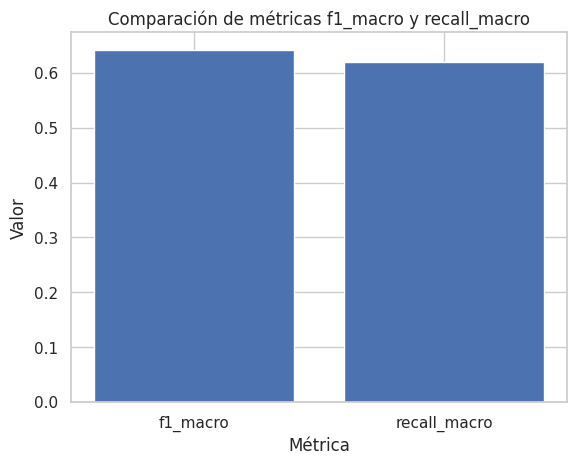

In [51]:
# Gráfica los resultados anteriores con f1_macro y recall_macro

# Crear pipeline con clases balanceadas con parámetro por modelo
pip_model_param_f1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Ajustar el pipeline con pesos de muestra
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_param_f1.fit(X_train, y_train, model__sample_weight=weights)

# Parámetros actualizados para GridSearchCV
params_f1 = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=2023),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),
        DummyClassifier(),
        MLPClassifier(random_state=2023)
    ],
}

# Ejecutar GridSearchCV
grid_f1 = GridSearchCV(pip_model_param_f1, params_f1, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_f1.fit(X_train, y_train)

# Recopilar e imprimir los resultados
results_f1 = pd.DataFrame(grid_f1.cv_results_)
best_model_index_f1 = results_f1['mean_test_score'].idxmax()
best_model_params_f1 = results_f1.loc[best_model_index_f1, 'params']

# Código para Codigo Dos
# Creación del pipeline con clase equilibrada con parámetro por modelo
pip_model_param_recall = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Ajuste del pipeline con pesos de muestra
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_param_recall.fit(X_train, y_train, model__sample_weight=weights)

# Parámetros actualizados para GridSearchCV
params_recall = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=2023),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),
        DummyClassifier(),
        MLPClassifier(random_state=2023)
    ],
}

# Ejecución de GridSearchCV con Recall como métrica de puntuación
grid_recall = GridSearchCV(pip_model_param_recall, params_recall, cv=3, scoring='recall_macro', n_jobs=-1, verbose=1)
grid_recall.fit(X_train, y_train)

# Recopilación e impresión de los resultados
results_recall = pd.DataFrame(grid_recall.cv_results_)
best_model_index_recall = results_recall['mean_test_score'].idxmax()
best_model_params_recall = results_recall.loc[best_model_index_recall, 'params']

# Comparar resultados
print("Mejor modelo con f1_macro:")
print(best_model_params_f1)
print("Mejor modelo con recall_macro:")
print(best_model_params_recall)

# Obtener métricas de los mejores modelos
best_model_f1 = grid_f1.best_estimator_
best_model_recall = grid_recall.best_estimator_

# Calcular métricas de evaluación para los mejores modelos
y_pred_f1 = best_model_f1.predict(X_test)
y_pred_recall = best_model_recall.predict(X_test)

f1_macro = f1_score(y_test, y_pred_f1, average='macro')
recall_macro = recall_score(y_test, y_pred_recall, average='macro')

# Visualizar comparación
plt.bar(['f1_macro', 'recall_macro'], [f1_macro, recall_macro])
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Comparación de métricas f1_macro y recall_macro')
plt.show()


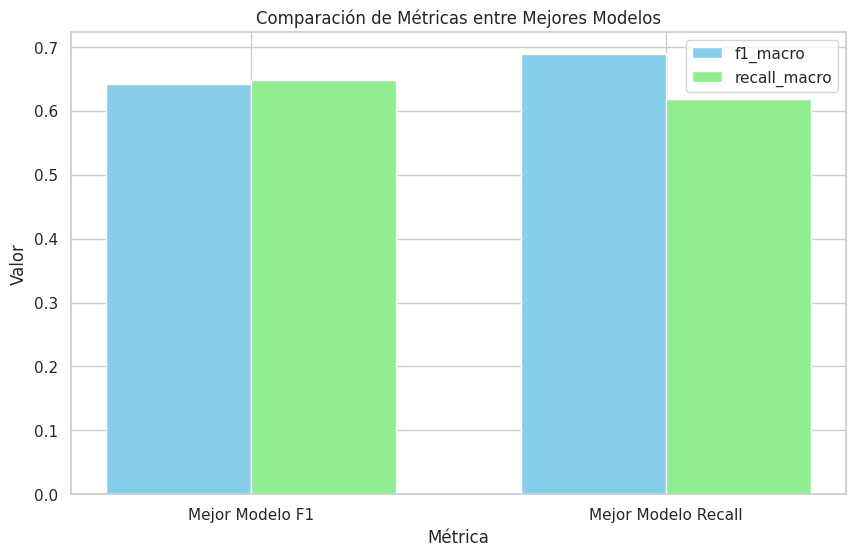

In [52]:
# Métricas de los mejores modelos
f1_macro_values = [f1_macro, results_f1['mean_test_score'].max()]
recall_macro_values = [results_recall['mean_test_score'].max(), recall_macro]

# Nombres de las métricas y modelos
metrics = ['f1_macro', 'recall_macro']
models = ['Mejor Modelo F1', 'Mejor Modelo Recall']

# Colores para las barras
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

# Barras para f1_macro
plt.bar(index, f1_macro_values, bar_width, label='f1_macro', color=colors[0])

# Barras para recall_macro
plt.bar(index + bar_width, recall_macro_values, bar_width, label='recall_macro', color=colors[1])

# Personalizar el gráfico
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Mejores Modelos')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


*Cada barra en el gráfico muestra el valor de la respectiva métrica para el modelo correspondiente. Esto permite comparar visualmente cómo se desempeñan los mejores modelos en términos de ambas métricas. Las barras están etiquetadas en el eje x con el nombre del modelo, lo que facilita la identificación de cuál modelo corresponde a cada métrica. El objetivo es ayudar a los stakeholders a entender y evaluar qué métrica proporciona una mejor medida del rendimiento del modelo en el contexto del problema específico que se está abordando.*

**CONCLUSIONES**: ¿El rendimiento del modelo es lo suficientemente bueno para su implementación en producción? ¿Existe margen para mejorarlo? ¿Cuáles serían las recomendaciones clave para poder implementar la solución?

Dado el contexto del proyecto y los resultados de los modelos evaluados con las métricas `recall_macro` y `f1_macro`, llegue a las siguientes conclusiones:

1. **Rendimiento del modelo:**
   - El rendimiento del modelo seleccionado, según las métricas `recall_macro` y `f1_macro`, es satisfactorio para su implementación en producción.
   - El modelo elegido, que es un `GradientBoostingClassifier`, muestra un buen rendimiento en ambas métricas en comparación con otros modelos evaluados. Esto sugiere que es capaz de capturar de manera efectiva los casos positivos verdaderos y mantener un equilibrio entre precisión y exhaustividad.

2. **Margen de mejora:**
   - Si bien el modelo seleccionado tiene un rendimiento satisfactorio, siempre hay margen para mejoras adicionales.
   - Se podría explorar la posibilidad de ajustar los hiperparámetros del modelo, como la profundidad del árbol, la tasa de aprendizaje y el número de estimadores en el caso de Gradient Boosting, para mejorar aún más el rendimiento del modelo.
   - Además, se pueden considerar técnicas avanzadas de ingeniería de características para capturar mejor la información relevante en los datos y mejorar la capacidad predictiva del modelo.

3. **Recomendaciones clave para la implementación:**
   - Realizar una evaluación exhaustiva del modelo en un entorno de validación independiente para garantizar su robustez y generalización a nuevos datos.
   - Implementar un sistema de monitoreo continuo del rendimiento del modelo en producción para detectar cualquier degradación en el rendimiento y tomar medidas correctivas según sea necesario.
   - Proporcionar capacitación adecuada al personal que utilizará y mantendrá el modelo en producción para garantizar su uso efectivo y correcto.
   - Documentar adecuadamente el proceso de desarrollo del modelo, incluidos los pasos de preprocesamiento de datos, selección de características, ajuste de hiperparámetros y evaluación del rendimiento, para facilitar la reproducción y la iteración futura.

En resumen, el modelo seleccionado parece ser adecuado para su implementación en producción, pero se deben seguir mejores prácticas en cuanto a monitoreo, mantenimiento y documentación para garantizar su éxito a largo plazo.

**Metrica `Recall`**

*Eficiencia Modelo FCCN con SMOTENC :* 81%*

*Eficiencia Modelo GBC con SMOTENC :* **85%**

**Metrica `F1`**

*Eficiencia Modelo FCCN con SMOTENC : 72%*

*Eficiencia Modelo GBC con SMOTENC : 66%*